In [ ]:
cd /content/drive/MyDrive/kaggle_study/06-bus

/content/drive/MyDrive/kaggle_study/06-bus


In [ ]:
import pandas as pd # Analysis
import numpy as np # Analysis
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

color = sns.color_palette()

# [1] Data Load

In [ ]:
train = pd.read_csv('train.csv', parse_dates=['date'])
test = pd.read_csv('test.csv', parse_dates=['date'])
train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             415423 non-null  int64         
 1   date           415423 non-null  datetime64[ns]
 2   bus_route_id   415423 non-null  int64         
 3   in_out         415423 non-null  object        
 4   station_code   415423 non-null  int64         
 5   station_name   415423 non-null  object        
 6   latitude       415423 non-null  float64       
 7   longitude      415423 non-null  float64       
 8   6~7_ride       415423 non-null  float64       
 9   7~8_ride       415423 non-null  float64       
 10  8~9_ride       415423 non-null  float64       
 11  9~10_ride      415423 non-null  float64       
 12  10~11_ride     415423 non-null  float64       
 13  11~12_ride     415423 non-null  float64       
 14  6~7_takeoff    415423 non-null  float64       
 15  

## Unique Value 확인

In [5]:
train_unique = []
for i in train.columns.values:
    train_unique.append(len(train[i].unique()))
unique_train = pd.DataFrame()
unique_train['Columns'] = list(train.columns)
unique_train['Unique_value'] = train_unique
unique_train

,Columns,Unique_value
0,id,415423
1,date,30
2,bus_route_id,613
3,in_out,2
4,station_code,3563
5,station_name,1961
6,latitude,3278
7,longitude,3446
8,6~7_ride,47
9,7~8_ride,80


# [2] Data Processing
신용카드 거래 데이터 분석 코드 [참고](04-credit_card-visualization/04_credit_card_visualization_1stCode.ipynb)

거래 데이터 발생과 비슷하게 퇴근 시간의 인원도 평일에 더 많이 발생하는 경향이므로 위 코드를 많이 참고함

## 평일/주말/휴일 열 추가

In [6]:
# date를 통해 주말 / 주일 분류 -> weekday(1) / weekday(0)
train['weekday'] = train['date'].dt.weekday.apply(lambda x: 1 if x > 4 else 0)
test['weekday'] = test['date'].dt.weekday.apply(lambda x: 1 if x > 4 else 0)

# 공휴일 정보 - weekday(2)
train_holiday_list = [12, 13, 14]
train['holiday'] = train['date'].dt.day.apply(lambda x: 1 if x in train_holiday_list else 0)
train['weekday'] = (train['weekday'] + train['holiday']).apply(lambda x: 2 if x >= 3 else x)

test_holiday_list = [3, 9]
test['holiday'] = test['date'].dt.day.apply(lambda x: 2 if x in test_holiday_list else 0)
test['weekday'] = (test['weekday'] + train['holiday']).apply(lambda x: 2 if x >= 3 else x)

## 시내·시외버스 라벨링

In [7]:
# 시내(0) / 시외(1)
train['in_out'] = train['in_out'].map({'시내': 0, '시외': 1})
test['in_out'] = test['in_out'].map({'시내': 0, '시외': 1})

In [8]:
train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday,holiday
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1,0
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1,0
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
415419,415419,2019-09-30,32820000,0,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
415420,415420,2019-09-30,32820000,0,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
415421,415421,2019-09-30,32820000,0,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## feature 제거
정류장 이름, 경도 및 위도는 정류장 고유 번호로 대체 가능하므로 제거

In [10]:
drop_cols=['id','date','station_name','station_name','latitude','longitude', 'holiday']
train=train.drop(drop_cols,axis=1)
test=test.drop(drop_cols,axis=1)

In [11]:
# weekday 열을 4번째 열로 순서 변경
train = train[list(train.columns[0:3])+['weekday']+list(train.columns[3:-1])]
test = test[list(test.columns[0:3])+['weekday']+list(test.columns[3:-1])]
train

,bus_route_id,in_out,station_code,weekday,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,4270000,1,344,1,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4270000,1,357,1,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4270000,1,432,1,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,4270000,0,1579,1,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4270000,0,1646,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,32820000,0,1129,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,32820000,0,1564,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,32820000,0,2322,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415421,32820000,0,3291,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 연관관계 분석

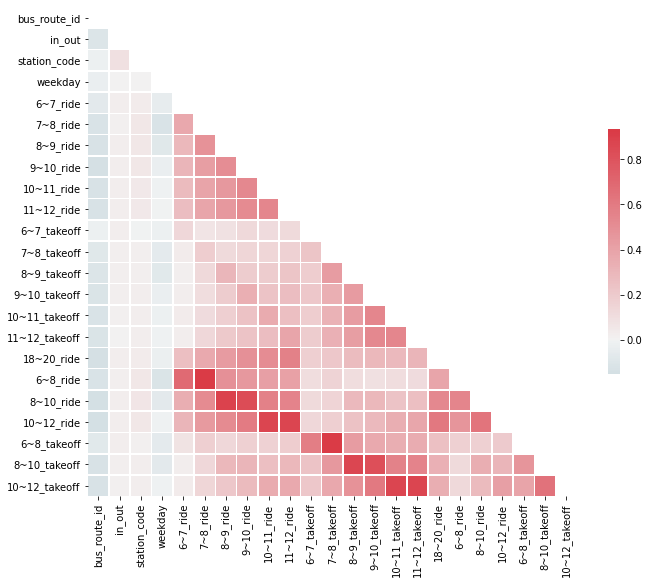

In [15]:
# column 간의 상관관계 분석 DataFrame.corr() 
corr = train.corr()

# 삼각형 마스크 만들기 (위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [16]:
corr = train.corr().unstack().sort_values(ascending=False).drop_duplicates()
corr.drop(corr.index[0],inplace=True)
corr

6~8_ride       7~8_ride         0.933272
6~8_takeoff    7~8_takeoff      0.925347
8~9_ride       8~10_ride        0.890609
11~12_ride     10~12_ride       0.882002
11~12_takeoff  10~12_takeoff    0.880691
                                  ...   
10~12_takeoff  bus_route_id    -0.129819
bus_route_id   9~10_ride       -0.137973
               18~20_ride      -0.143702
10~12_ride     bus_route_id    -0.147186
8~10_ride      bus_route_id    -0.152482
Length: 253, dtype: float64

#[3] Merge Data
예측해야하는 것은 18-20시로 2시간 단위의 탑승 인원인데,   
각 열은 1시간 단위의 탑승 및 하차 인원이므로 2시간 단위로 합친 데이터 추가


In [17]:
train_merge = train

train_merge['6~8_ride'] = train['6~7_ride'] + train['7~8_ride']
train_merge['8~10_ride'] = train['8~9_ride'] + train['9~10_ride']
train_merge['10~12_ride'] = train['10~11_ride'] + train['11~12_ride']

train_merge['6~8_takeoff'] = train['6~7_takeoff'] + train['7~8_takeoff']
train_merge['8~10_takeoff'] = train['8~9_takeoff'] + train['9~10_takeoff']
train_merge['10~12_takeoff'] = train['10~11_takeoff'] + train['11~12_takeoff']

drop_cols=['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride','11~12_ride', '6~7_takeoff','7~8_takeoff','8~9_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff']
train_merge=train_merge.drop(drop_cols,axis=1)

In [18]:
test_merge = test

test_merge['6~8_ride'] = test['6~7_ride'] + test['7~8_ride']
test_merge['8~10_ride'] = test['8~9_ride'] + test['9~10_ride']
test_merge['10~12_ride'] = test['10~11_ride'] + test['11~12_ride']

test_merge['6~8_takeoff'] = test['6~7_takeoff'] + test['7~8_takeoff']
test_merge['8~10_takeoff'] = test['8~9_takeoff'] + test['9~10_takeoff']
test_merge['10~12_takeoff'] = test['10~11_takeoff'] + test['11~12_takeoff']

drop_cols=['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride','11~12_ride', '6~7_takeoff','7~8_takeoff','8~9_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff']
test_merge=test_merge.drop(drop_cols,axis=1)

In [19]:
# 18~20_ride를 마지막 column으로 순서 변경
train_merge = train_merge[list(train_merge.columns[0:4])+list(train_merge.columns[5:])+['18~20_ride']]
train_merge

,bus_route_id,in_out,station_code,weekday,6~8_ride,8~10_ride,10~12_ride,6~8_takeoff,8~10_takeoff,10~12_takeoff,18~20_ride
0,4270000,1,344,1,1.0,7.0,8.0,0.0,0.0,0.0,0.0
1,4270000,1,357,1,5.0,6.0,11.0,0.0,0.0,0.0,5.0
2,4270000,1,432,1,2.0,2.0,0.0,0.0,0.0,0.0,2.0
3,4270000,0,1579,1,17.0,32.0,30.0,0.0,0.0,0.0,53.0
4,4270000,0,1646,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
415418,32820000,0,1129,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,32820000,0,1564,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,32820000,0,2322,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415421,32820000,0,3291,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## 연관관계 분석
2시간 단위로 합친 버전의 연관관계 분석

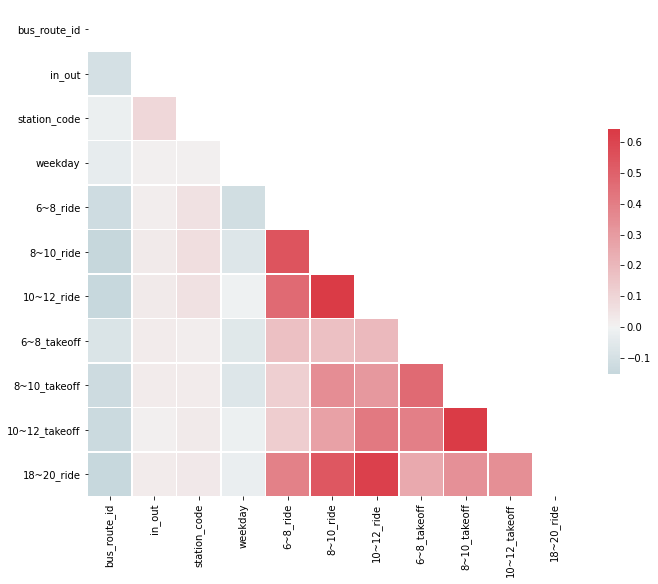

In [20]:
# column 간의 상관관계 분석 DataFrame.corr() 
corr = train_merge.corr()

# 삼각형 마스크 만들기 (위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [21]:
corr = train_merge.corr().unstack().sort_values(ascending=False).drop_duplicates()
corr.drop(corr.index[0],inplace=True)
print(corr.head())
print(corr.tail())

8~10_takeoff  10~12_takeoff    0.640996
8~10_ride     10~12_ride       0.640145
18~20_ride    10~12_ride       0.616721
8~10_ride     6~8_ride         0.548672
              18~20_ride       0.538263
dtype: float64
8~10_takeoff   bus_route_id   -0.126992
10~12_takeoff  bus_route_id   -0.129819
18~20_ride     bus_route_id   -0.143702
bus_route_id   10~12_ride     -0.147186
               8~10_ride      -0.152482
dtype: float64


In [22]:
print(train.shape)
print(test.shape)
print(train_merge.shape)
print(test_merge.shape)

(415423, 23)
(228170, 22)
(415423, 11)
(228170, 10)


In [23]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

x_train_merge = train_merge.iloc[:,:-1]
y_train_merge = train_merge.iloc[:,-1]

In [24]:
print(x_train.shape)
print(y_train.shape)
print(test.shape)
print(x_train_merge.shape)
print(y_train_merge.shape)
print(test_merge.shape)

(415423, 22)
(415423,)
(228170, 22)
(415423, 10)
(415423,)
(228170, 10)


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_std = scaler.fit_transform(x_train)
test_std = scaler.transform(test)

train_merge_std = scaler.fit_transform(x_train_merge)
test_merge_std = scaler.transform(test_merge)

#[4] Train
original 버전과 merge 버전 각각 나눠서 학습 및 평가

## 1) Original

### (1) xgboost - org.ver.

In [38]:
from sklearn.model_selection import train_test_split

target = '18~20_ride'
cols_to_drop = [target]
cols_to_fit = [col for col in train.columns if col not in cols_to_drop]
train_split, val_split = train_test_split(train, test_size=0.3)

[09:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.80761
[10]	validation_0-rmse:4.63507
[20]	validation_0-rmse:4.48595
[30]	validation_0-rmse:4.35664
[40]	validation_0-rmse:4.24596
[50]	validation_0-rmse:4.14894
[60]	validation_0-rmse:4.06577
[70]	validation_0-rmse:3.99246
[80]	validation_0-rmse:3.92817
[90]	validation_0-rmse:3.87351
[100]	validation_0-rmse:3.82646
[110]	validation_0-rmse:3.78333
[120]	validation_0-rmse:3.74695
[130]	validation_0-rmse:3.71312
[140]	validation_0-rmse:3.68327
[150]	validation_0-rmse:3.65694
[160]	validation_0-rmse:3.63383
[170]	validation_0-rmse:3.61215
[180]	validation_0-rmse:3.59259
[190]	validation_0-rmse:3.57566
[199]	validation_0-rmse:3.5618


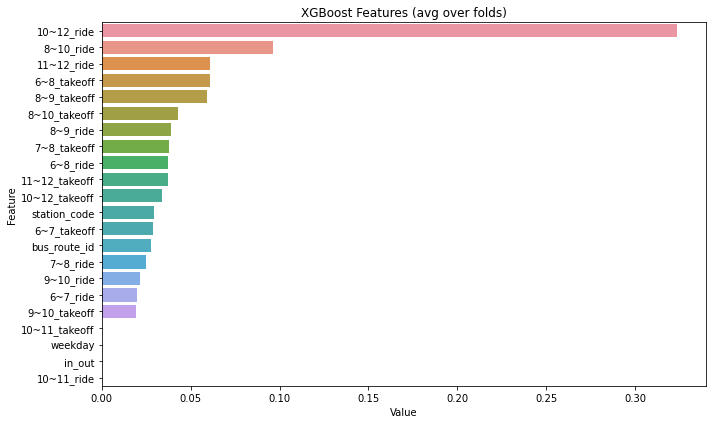

In [39]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV

params = {
    'n_estimators': 200,
    'learning_rate': 0.01, 
    'num_leaves': 10,
    'verbose': -1,
}


xgb_model = XGBRegressor(**params)
xgb_model.fit(
    train_split[cols_to_fit], train_split[target],
    eval_set=[(val_split[cols_to_fit], val_split[target])],
    verbose=10,
)


feature_importance = pd.DataFrame(sorted(zip(xgb_model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

### (2) lightGBM - org.ver.

[10]	valid_0's l2: 21.1074	valid_0's l1: 1.75573
[20]	valid_0's l2: 19.7312	valid_0's l1: 1.6916
[30]	valid_0's l2: 18.5906	valid_0's l1: 1.63637
[40]	valid_0's l2: 17.6296	valid_0's l1: 1.5901
[50]	valid_0's l2: 16.8221	valid_0's l1: 1.55274
[60]	valid_0's l2: 16.1393	valid_0's l1: 1.51867
[70]	valid_0's l2: 15.5602	valid_0's l1: 1.49071
[80]	valid_0's l2: 15.026	valid_0's l1: 1.46557
[90]	valid_0's l2: 14.543	valid_0's l1: 1.44223
[100]	valid_0's l2: 14.1373	valid_0's l1: 1.42033
[110]	valid_0's l2: 13.7642	valid_0's l1: 1.40062
[120]	valid_0's l2: 13.4446	valid_0's l1: 1.38376
[130]	valid_0's l2: 13.1381	valid_0's l1: 1.36807
[140]	valid_0's l2: 12.8924	valid_0's l1: 1.35429
[150]	valid_0's l2: 12.6731	valid_0's l1: 1.34033
[160]	valid_0's l2: 12.4753	valid_0's l1: 1.32807
[170]	valid_0's l2: 12.304	valid_0's l1: 1.31637
[180]	valid_0's l2: 12.1618	valid_0's l1: 1.30594
[190]	valid_0's l2: 12.0355	valid_0's l1: 1.29642
[200]	valid_0's l2: 11.9145	valid_0's l1: 1.28745


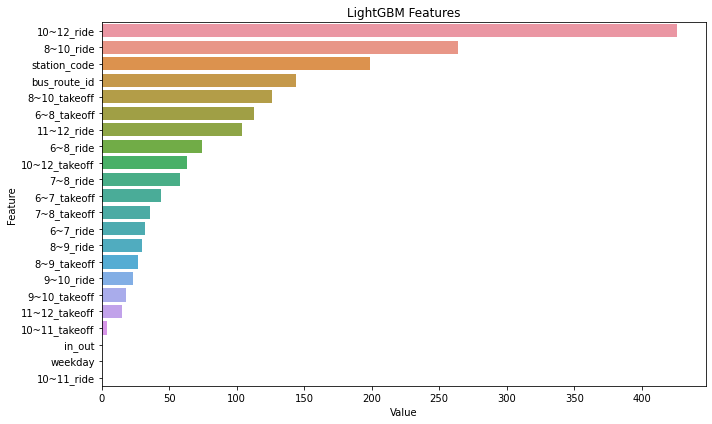

In [40]:
from lightgbm import LGBMRegressor
params = {
    'n_estimators': 200,
    'learning_rate': 0.01, 
    'num_leaves': 10,
    'objective': 'regression_l2', 
    'metric': ['mae', 'mse'],
    'verbose': -1,
}

lgbm_model = LGBMRegressor(**params)
lgbm_model.fit(
    train_split[cols_to_fit], train_split[target],
    eval_set=[(val_split[cols_to_fit], val_split[target])],
    eval_metric=['mae', 'mse'],
    verbose=10,
)

feature_importance = pd.DataFrame(sorted(zip(lgbm_model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [41]:
xgb_pred=xgb_model.predict(test)
lgb_pred=lgbm_model.predict(test)

## 2) Merge

### (1) xgboost - merge ver.

In [42]:
target = '18~20_ride'
cols_to_drop = [target]
cols_to_fit = [col for col in train_merge.columns if col not in cols_to_drop]
train_split, val_split = train_test_split(train_merge, test_size=0.3)

[09:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.69289
[10]	validation_0-rmse:4.51487
[20]	validation_0-rmse:4.36181
[30]	validation_0-rmse:4.22986
[40]	validation_0-rmse:4.11646
[50]	validation_0-rmse:4.02013
[60]	validation_0-rmse:3.93646
[70]	validation_0-rmse:3.86375
[80]	validation_0-rmse:3.80179
[90]	validation_0-rmse:3.74715
[100]	validation_0-rmse:3.69877
[110]	validation_0-rmse:3.65835
[120]	validation_0-rmse:3.62341
[130]	validation_0-rmse:3.5918
[140]	validation_0-rmse:3.5638
[150]	validation_0-rmse:3.53917
[160]	validation_0-rmse:3.51831
[170]	validation_0-rmse:3.50004
[180]	validation_0-rmse:3.48338
[190]	validation_0-rmse:3.46666
[199]	validation_0-rmse:3.45485


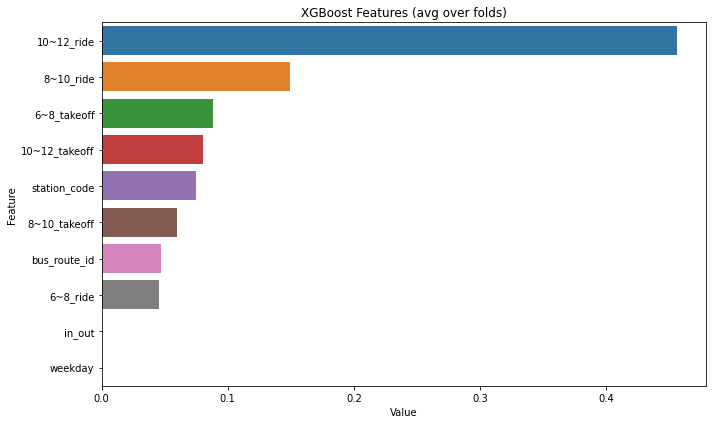

In [43]:
from xgboost import XGBRegressor
params = {
    'n_estimators': 200,
    'learning_rate': 0.01, 
    'num_leaves': 10,
    'verbose': -1,
}

xgb_model = XGBRegressor(**params)
xgb_model.fit(
    train_split[cols_to_fit], train_split[target],
    eval_set=[(val_split[cols_to_fit], val_split[target])],
    verbose=10,
)

feature_importance = pd.DataFrame(sorted(zip(xgb_model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

### (2) lightGBM - merge ver.

[10]	valid_0's l2: 20.0161	valid_0's l1: 1.75045
[20]	valid_0's l2: 18.6679	valid_0's l1: 1.6864
[30]	valid_0's l2: 17.555	valid_0's l1: 1.63088
[40]	valid_0's l2: 16.6186	valid_0's l1: 1.58341
[50]	valid_0's l2: 15.8257	valid_0's l1: 1.5464
[60]	valid_0's l2: 15.1634	valid_0's l1: 1.51372
[70]	valid_0's l2: 14.5829	valid_0's l1: 1.4845
[80]	valid_0's l2: 14.1056	valid_0's l1: 1.45805
[90]	valid_0's l2: 13.696	valid_0's l1: 1.43421
[100]	valid_0's l2: 13.3439	valid_0's l1: 1.41286
[110]	valid_0's l2: 13.021	valid_0's l1: 1.39436
[120]	valid_0's l2: 12.7372	valid_0's l1: 1.37798
[130]	valid_0's l2: 12.4938	valid_0's l1: 1.3618
[140]	valid_0's l2: 12.2796	valid_0's l1: 1.34638
[150]	valid_0's l2: 12.0788	valid_0's l1: 1.33377
[160]	valid_0's l2: 11.9055	valid_0's l1: 1.32196
[170]	valid_0's l2: 11.7315	valid_0's l1: 1.31126
[180]	valid_0's l2: 11.583	valid_0's l1: 1.30154
[190]	valid_0's l2: 11.4425	valid_0's l1: 1.29257
[200]	valid_0's l2: 11.3178	valid_0's l1: 1.28379


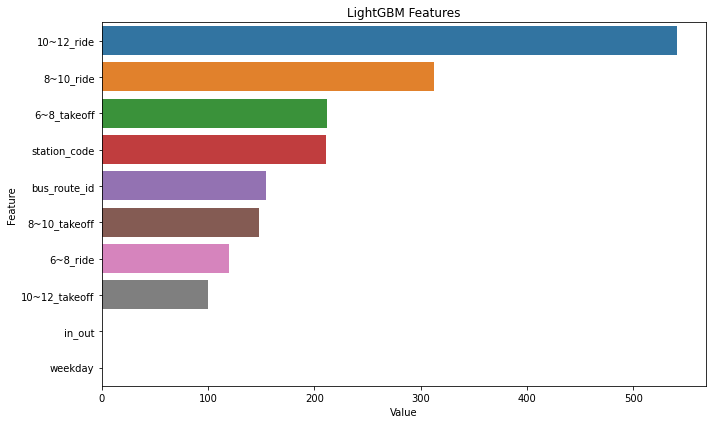

In [44]:
from lightgbm import LGBMRegressor
params = {
    'n_estimators': 200,
    'learning_rate': 0.01, 
    'num_leaves': 10,
    'objective': 'regression_l2', 
    'metric': ['mae', 'mse'],
    'verbose': -1,
}

lgbm_model = LGBMRegressor(**params)
lgbm_model.fit(
    train_split[cols_to_fit], train_split[target],
    eval_set=[(val_split[cols_to_fit], val_split[target])],
    eval_metric=['mae', 'mse'],
    verbose=10,
)

feature_importance = pd.DataFrame(sorted(zip(lgbm_model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [45]:
xgb_merge_pred=xgb_model.predict(test_merge)
lgb_merge_pred=lgbm_model.predict(test_merge)

org. ver. & merge ver. 모두 10-12시 탑승 인원이 가장 중요한 feature임을 확인

# [5] Evaluation

In [50]:
submit = pd.read_csv('submission_sample.csv')
submit_merge = pd.read_csv('submission_sample.csv')

In [62]:
submit['18~20_ride'] = xgb_pred*0.5 + lgb_pred*0.5
submit['18~20_ride'] = submit['18~20_ride'].astype(np.int32)
submit_merge['18~20_ride'] = xgb_merge_pred*0.5 + lgb_merge_pred*0.5
submit_merge['18~20_ride'] = submit_merge['18~20_ride'].astype(np.int32)

In [64]:
submit.to_csv('submission.csv', index = False)
submit_merge.to_csv('submission_merge.csv', index = False)

* org ver. [3.18]
* merge ver. [3.16]

2시간 단위로 결합한 것이 더 좋은 성능을 보임
